<a href="https://colab.research.google.com/github/kartik-commits/machine_learning-projects/blob/main/1_Regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pandas --> Excel on Steroids

In [ ]:
import pandas

# Create dataframe from file using 'Pandas'

In [ ]:
file_path='/content/drive/MyDrive/Colab Notebooks/bucket/attendance_raw_data.csv'
df=pandas.read_csv(file_path)

# Show 'head' --> 1st elements of data

In [ ]:
df.head()

,Student ID,Lectures Attended (out of 60),"Result (1 = Pass, 0 = Fail)"
0,1,55,1
1,2,52,1
2,3,15,0
3,4,28,0
4,5,48,1


# Show 'tail' --> last elements of data

In [ ]:
df.tail()

,Student ID,Lectures Attended (out of 60),"Result (1 = Pass, 0 = Fail)"
15,16,50,1
16,17,33,1
17,18,19,0
18,19,51,0
19,20,29,1


# We are using ***scikit-learn***

# If we do '*import sklearn*', we only get top-level sub-packages. And scikit-learn is huge library, **so we just importing the necsessary sub-packages**

In [ ]:
from sklearn.model_selection import train_test_split

# Imported *train_test_split* for validation

In [ ]:
from sklearn.linear_model import LogisticRegression

# Imported *logistic_regression* to divide into 2 classes i.e. Pass or Fail

# Start with dividing dataset:-

X (Metric) contains all inputs

y (vector) contains all target-labels

In [ ]:
# Separate the data into features (X) and target (y)
# X is the clue (input), y is the answer (output).
X = df[['Lectures Attended (out of 60)']]
y = df['Result (1 = Pass, 0 = Fail)']

# Start train_test_split:-

We use 0.2 test_size i.e. 20% for testing and 80% for training

We use

In [ ]:
# Split the data into a training set and a testing set
# 80% of the data will be for training, 20% for testing.
# random_state ensures we get the same 'random' split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Create and train the model:-

In [ ]:
model = LogisticRegression()

# We 'fit' the model to our training data. This is the learning step.
# The model analyzes *X_train and y_train* to find the relationship between them.

In [ ]:
model.fit(X_train, y_train) # Find best-fit pattern
print("Model training has been successfully completed!✅")

Model training has been successfully completed!✅


# Evaluate the model's performance
# To see how model reacts with unseen-data

In [ ]:
y_pred = model.predict(X_test)

# We compare the model's predictions (y_pred) to the actual answers (y_test) to calculate its accuracy.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📈 Model Accuracy on the Test Set: {accuracy * 100:.2f}%")


📈 Model Accuracy on the Test Set: 100.00%


# Let's see the actual results vs. what our model predicted for the test set.

In [ ]:
print("\n--- Test Set Evaluation ---")
print(f"Actual Student Results:    {y_test.values}")
print(f"Model's Predicted Results: {y_pred}")


--- Test Set Evaluation ---
Actual Student Results:    [0 1 0 0]
Model's Predicted Results: [0 1 0 0]


# Use the trained model to make new predictions


In [ ]:
import numpy as np  # We need numpy to create array
new_students_attendance = np.array([[42], [32], [10], [30], [29], [60], [31], [33]])
new_predictions = model.predict(new_students_attendance)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("\n--- Making Predictions for New Students ---")
for i in range(len(new_students_attendance)):
    lectures = new_students_attendance[i][0]
    prediction = new_predictions[i]
    result = "Likely to Pass" if prediction == 1 else "Likely to Fail"
    print(f"A student attending {lectures} lectures is: {result}")


--- Making Predictions for New Students ---
A student attending 42 lectures is: Likely to Pass
A student attending 32 lectures is: Likely to Fail
A student attending 10 lectures is: Likely to Fail
A student attending 30 lectures is: Likely to Fail
A student attending 29 lectures is: Likely to Fail
A student attending 60 lectures is: Likely to Pass
A student attending 31 lectures is: Likely to Fail
A student attending 33 lectures is: Likely to Pass


# Visualize the logistic regression line

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


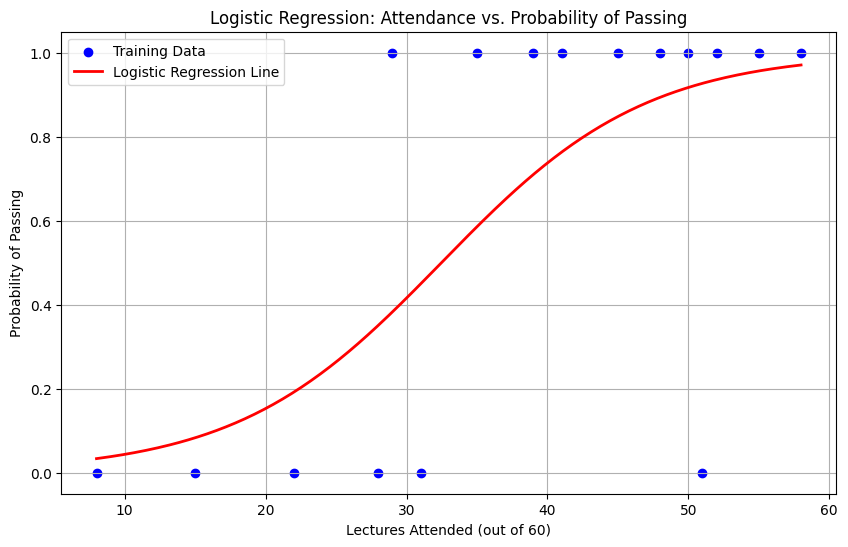

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of attendance values for plotting the regression line
# We use reshape(-1, 1) to make it a 2D array, as expected by the model's predict_proba method
X_range = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)

# Predict the probabilities of passing for each attendance value in X_range
# The second column ([ :, 1]) gives the probability of the positive class (passing, which is 1)
y_proba = model.predict_proba(X_range)[:, 1]

# Create the scatter plot of the training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot the logistic regression line
# We use the predicted probabilities (y_proba) against the attendance range (X_range)
plt.plot(X_range, y_proba, color='red', linewidth=2, label='Logistic Regression Line')

# Add labels and title
plt.xlabel('Lectures Attended (out of 60)')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Attendance vs. Probability of Passing')
plt.legend()
plt.grid(True)
plt.show()